In [1]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig
!pip install geopandas 
import geopandas
!pip install contextily
import contextily as ctx
import pandas as pd 

     |████████████████████████████████| 994 kB 5.4 MB/s 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   837k      0 --:--:-- --:--:-- --:--:--  837k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for 

In [116]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g")
puntiVaccinali = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv")
guariti = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/soggetti-guariti.csv")
popolazione = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")
vaccini = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv")

1. una mappa dell'Italia con le province colorate in base al numero di centri vaccinali Covid

In [3]:
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [4]:
puntiVaccinali

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


In [46]:
puntiProv = puntiVaccinali.groupby("provincia").count()["presidio_ospedaliero"].reset_index()
puntiProv

,provincia,presidio_ospedaliero
0,AGRIGENTO,5
1,ALESSANDRIA,4
2,ANCONA,2
3,AOSTA,2
4,AREZZO,1
...,...,...
106,VERCELLI,2
107,VERONA,1
108,VIBO VALENTIA,1
109,VICENZA,1


In [47]:
province["DEN_UTS"] = province["DEN_UTS"].str.upper()
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,VERCELLI,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,NOVARA,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,CUNEO,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,ASTI,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,VERBANO-CUSIO-OSSOLA,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,MONZA E DELLA BRIANZA,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,FERMO,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,BARLETTA-ANDRIA-TRANI,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [48]:
df_province_punti = pd.merge(province,puntiProv,how="inner",left_on="DEN_UTS",right_on="provincia")
df_province_punti

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry,provincia,presidio_ospedaliero
0,1,1,1,201,201,-,Torino,TORINO,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5...",TORINO,10
1,1,1,2,0,2,Vercelli,-,VERCELLI,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5...",VERCELLI,2
2,1,1,3,0,3,Novara,-,NOVARA,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5...",NOVARA,3
3,1,1,4,0,4,Cuneo,-,CUNEO,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928...",CUNEO,4
4,1,1,5,0,5,Asti,-,ASTI,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4...",ASTI,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2,8,99,0,99,Rimini,-,RIMINI,RN,Provincia,254852.128781,8.658220e+08,"POLYGON ((779573.576 4891555.437, 780189.685 4...",RIMINI,1
87,3,9,100,0,100,Prato,-,PRATO,PO,Provincia,119039.644116,3.658260e+08,"POLYGON ((673895.993 4886075.201, 673938.993 4...",PRATO,1
88,4,18,101,0,101,Crotone,-,CROTONE,KR,Provincia,255379.678840,1.734212e+09,"POLYGON ((1193301.060 4396651.846, 1193357.426...",CROTONE,1
89,4,18,102,0,102,Vibo Valentia,-,VIBO VALENTIA,VV,Provincia,202524.198570,1.148196e+09,"POLYGON ((1133745.148 4322320.462, 1134354.272...",VIBO VALENTIA,1


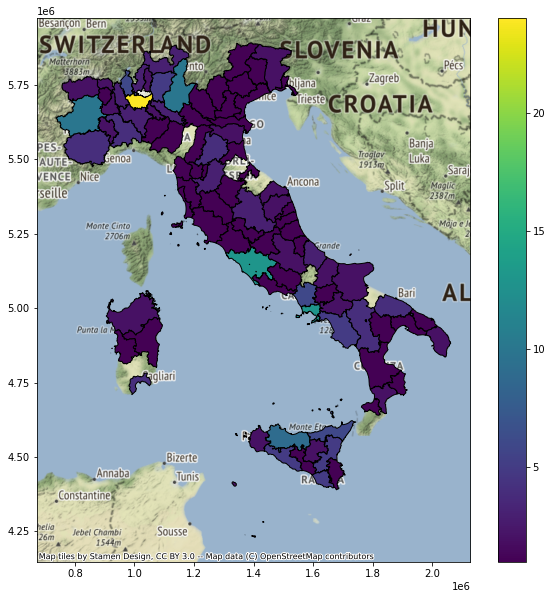

In [117]:
ax = df_province_punti.to_crs(epsg=3857).plot(figsize=(10,10),column="presidio_ospedaliero",legend=True,edgecolor="k")
ctx.add_basemap(ax)

2. una mappa dell'Italia con le regioni colorate in base alla percentuale di guariti dal Covid rispetto la popolazione

In [118]:
regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


In [119]:
guariti 

,area,nome_area,fascia_anagrafica,totale_guariti
0,ABR,Abruzzo,05-11,11532
1,ABR,Abruzzo,12-19,4279
2,ABR,Abruzzo,20-29,2473
3,ABR,Abruzzo,30-39,3469
4,ABR,Abruzzo,40-49,4367
...,...,...,...,...
184,VEN,Veneto,40-49,38700
185,VEN,Veneto,50-59,38094
186,VEN,Veneto,60-69,14472
187,VEN,Veneto,70-79,4939


In [120]:
popolazione

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
...,...,...,...,...
184,VEN,Veneto,40-49,715790
185,VEN,Veneto,50-59,806474
186,VEN,Veneto,60-69,610635
187,VEN,Veneto,70-79,494721


In [121]:
guariti2 = guariti.groupby(["area","nome_area"])["totale_guariti"].sum().reset_index()
guariti2

,area,nome_area,totale_guariti
0,ABR,Abruzzo,32274
1,BAS,Basilicata,9446
2,CAL,Calabria,37021
3,CAM,Campania,180294
4,EMR,Emilia-Romagna,189744
5,FVG,Friuli-Venezia Giulia,64525
6,LAZ,Lazio,172892
7,LIG,Liguria,57952
8,LOM,Lombardia,306057
9,MAR,Marche,64393


In [122]:
popolazione2 = popolazione.groupby("nome_area")["totale_popolazione"].sum().reset_index()
popolazione2

,nome_area,totale_popolazione
0,Abruzzo,1265353
1,Basilicata,524588
2,Calabria,1803821
3,Campania,5484138
4,Emilia-Romagna,4298305
5,Friuli-Venezia Giulia,1162352
6,Lazio,5528280
7,Liguria,1479768
8,Lombardia,9898997
9,Marche,1456240


In [123]:
df_popolazione_guariti = pd.merge(guariti2,popolazione2,how="inner",on="nome_area")
df_popolazione_guariti["percentuale"] = df_popolazione_guariti["totale_guariti"] / df_popolazione_guariti["totale_popolazione"] * 100
df_popolazione_guariti = df_popolazione_guariti[["nome_area","percentuale"]]
df_popolazione_guariti

,nome_area,percentuale
0,Abruzzo,2.550593
1,Basilicata,1.800651
2,Calabria,2.052366
3,Campania,3.287554
4,Emilia-Romagna,4.414391
5,Friuli-Venezia Giulia,5.551244
6,Lazio,3.127410
7,Liguria,3.916290
8,Lombardia,3.091798
9,Marche,4.421867


In [124]:
df_percentuale = pd.merge(regioni,df_popolazione_guariti,how="inner",left_on="DEN_REG",right_on="nome_area")
df_percentuale

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,4.043151
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5...",Valle d'Aosta,4.791969
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,3.091798
3,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,5.074719
4,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,3.916290
5,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,4.414391
6,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3.432389
7,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,2.905979
8,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,4.421867
9,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,3.127410


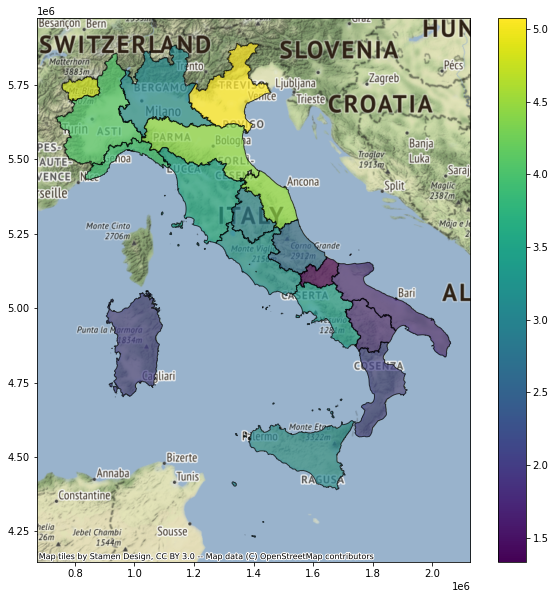

In [127]:
ax = df_percentuale.to_crs(epsg=3857).plot(figsize=(10,10),column="percentuale",legend=True,edgecolor="k",alpha=0.7)
ctx.add_basemap(ax)

3. una mappa dell'Italia con le regioni colorate in rosso se la percentuale di vaccinati (prima vaccinazione) è inferiore alla media e in verde se l apercentuale di vaccinati è superiore alla media

In [128]:
vaccini

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187117,2022-02-14,Pfizer/BioNTech,VEN,50-59,378,285,70,221,11,361,ITH,ITH3,5,Veneto
187118,2022-02-14,Pfizer/BioNTech,VEN,60-69,208,179,38,171,2,176,ITH,ITH3,5,Veneto
187119,2022-02-14,Pfizer/BioNTech,VEN,70-79,91,111,9,78,1,114,ITH,ITH3,5,Veneto
187120,2022-02-14,Pfizer/BioNTech,VEN,80-89,27,79,6,37,0,63,ITH,ITH3,5,Veneto


In [129]:
primaDose = vaccini.groupby("nome_area")["prima_dose"].sum().reset_index()
primaDose

,nome_area,prima_dose
0,Abruzzo,1046348
1,Basilicata,453935
2,Calabria,1510718
3,Campania,4528492
4,Emilia-Romagna,3647682
5,Friuli-Venezia Giulia,961656
6,Lazio,4832987
7,Liguria,1252625
8,Lombardia,8398142
9,Marche,1187118


In [130]:
popolazione2

,nome_area,totale_popolazione
0,Abruzzo,1265353
1,Basilicata,524588
2,Calabria,1803821
3,Campania,5484138
4,Emilia-Romagna,4298305
5,Friuli-Venezia Giulia,1162352
6,Lazio,5528280
7,Liguria,1479768
8,Lombardia,9898997
9,Marche,1456240


In [131]:
df_reg_prima = pd.merge(regioni,primaDose,how="inner",left_on="DEN_REG",right_on="nome_area")
df_tot = pd.merge(df_reg_prima,popolazione2,how="inner",on="nome_area")
df_tot

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353


In [132]:
df_tot["percentuale"] = df_tot["prima_dose"] / df_tot["totale_popolazione"] * 100
df_tot

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308,82.910865
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997,84.838312
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141,82.781496
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768,84.650094
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305,84.863266
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722,87.245546
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373,85.509065
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240,81.519392
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280,87.422978
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353,82.692182


In [133]:
df_tot.percentuale.mean()

84.64479574343098

In [134]:
regMin = df_tot[df_tot.percentuale < df_tot.percentuale.mean()]
regMin

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5...",Piemonte,3461784,4175308,82.910865
2,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5...",Veneto,3877602,4684141,82.781496
7,3,11,Marche,6.261785e+05,9.400594e+09,"POLYGON ((802303.985 4874996.456, 802366.734 4...",Marche,1187118,1456240,81.519392
9,4,13,Abruzzo,6.153465e+05,1.082885e+10,"MULTIPOLYGON (((930273.425 4714737.743, 930147...",Abruzzo,1046348,1265353,82.692182
11,4,15,Campania,8.881667e+05,1.366325e+10,"MULTIPOLYGON (((1037313.692 4449410.367, 10373...",Campania,4528492,5484138,82.574363
14,4,18,Calabria,8.378109e+05,1.521607e+10,"MULTIPOLYGON (((1083358.846 4416348.741, 10833...",Calabria,1510718,1803821,83.750993
15,5,19,Sicilia,1.334638e+06,2.582376e+10,"MULTIPOLYGON (((822886.611 3935355.889, 822871...",Sicilia,3834663,4665412,82.193448


In [135]:
regSup = df_tot[df_tot.percentuale > df_tot.percentuale.mean()]
regSup

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry,nome_area,prima_dose,totale_popolazione,percentuale
1,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366...",Lombardia,8398142,9898997,84.838312
3,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219...",Liguria,1252625,1479768,84.650094
4,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335...",Emilia-Romagna,3647682,4298305,84.863266
5,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563...",Toscana,3123148,3579722,87.245546
6,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910...",Umbria,717740,839373,85.509065
8,3,12,Lazio,1.054578e+06,1.722679e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769...",Lazio,4832987,5528280,87.422978
10,4,14,Molise,4.338181e+05,4.461183e+09,"POLYGON ((984002.800 4670714.415, 985067.040 4...",Molise,250950,288826,86.886222
12,4,16,Puglia,1.175757e+06,1.953616e+10,"MULTIPOLYGON (((1280636.111 4454459.746, 12806...",Puglia,3325820,3819923,87.065106
13,4,17,Basilicata,6.142055e+05,1.007274e+10,"MULTIPOLYGON (((1073707.061 4445700.106, 10737...",Basilicata,453935,524588,86.531716
16,5,20,Sardegna,1.438638e+06,2.409463e+10,"MULTIPOLYGON (((448813.650 4301762.751, 448823...",Sardegna,1341630,1568672,85.526484


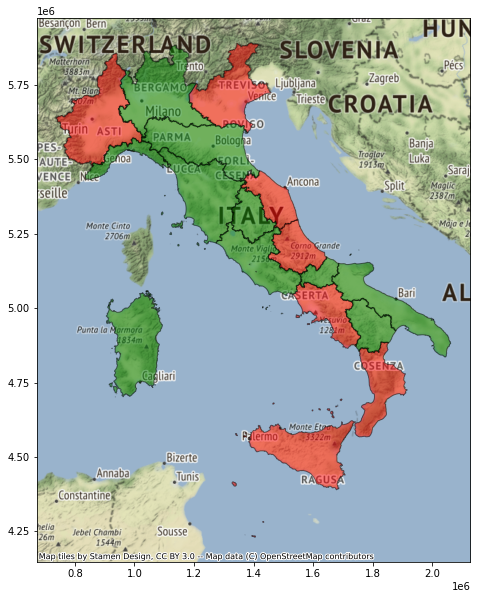

In [136]:
ax = regMin.to_crs(epsg=3857).plot(figsize=(10,10),facecolor="r",alpha=0.5,edgecolor="k")
regSup.to_crs(epsg=3857).plot(ax=ax,facecolor="g",alpha=0.5,edgecolor="k")
ctx.add_basemap(ax)